In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.lines as mlines
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm
import pickle
import numpy as np

import crflux.models as pm
import mceq_underground_helpers_cs as mh

In [2]:
plot_dir = '/hetghome/khymon/Plots/cs-analysis/'

In [21]:
with open("/hetghome/khymon/cs-files/R_value_const_pi-air_k-air_sibyll23c_smooth_oneregion_intthreshold500gev.pkl", "rb") as f:
    results_500 = pickle.load(f)

results_500_15 = results_500[('1.5', '1.01', '1.0', '2212', 'apr', '2.95')]
results_500_35 = results_500[('3.5', '1.01', '1.0', '2212', 'apr', '2.95')]

In [22]:
with open("/hetghome/khymon/cs-files/R_value_const_pi-air_k-air_sibyll23c_smooth_oneregion_intthreshold1gev.pkl", "rb") as f:
    results_1 = pickle.load(f)

results_1_15 = results_1[('1.5', '1.01', '1.0', '2212', 'apr', '2.95')]
results_1_35 = results_1[('3.5', '1.01', '1.0', '2212', 'apr', '2.95')]

In [23]:
with open("/hetghome/khymon/cs-files/R_value_const_pi-air_k-air_sibyll23c_smooth_oneregion_threshold.pkl", "rb") as f:
    results_thres_all = pickle.load(f)

# filter for correct e0
results_all_15 = results_thres_all[('1.5', '1.01', '1.0', '2212', 'apr', '2.95')]
results_all_35 = results_thres_all[('3.5', '1.01', '1.0', '2212', 'apr', '2.95')]

In [24]:
angles = mh.angles

In [26]:
results_all_15

array([1.00298651, 1.00338117, 1.00387571])

In [27]:
results_1_15

array([1.00295881, 1.00331623, 1.00385494])

In [28]:
results_500_15

array([1.00265744, 1.0024979 , 1.00238205])

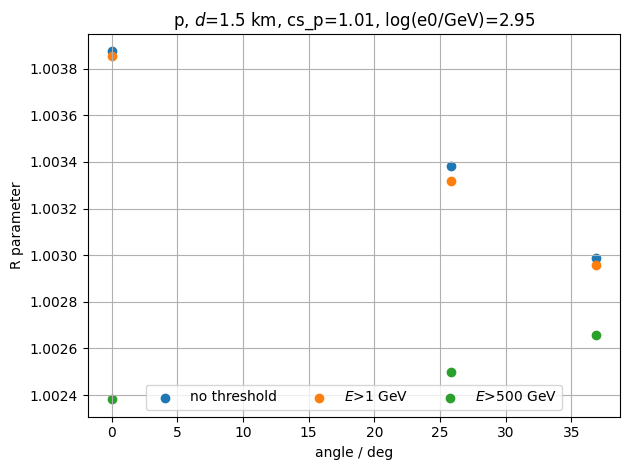

In [33]:
plt.figure()
plt.scatter(angles, results_all_15,label='no threshold')
plt.scatter(angles, results_1_15,label='$E$>1 GeV')
plt.scatter(angles, results_500_15,label='$E$>500 GeV')

plt.xlabel('angle / deg')
plt.ylabel('R parameter')
plt.legend(loc='lower center',ncol=3)
plt.title('p, $d$=1.5 km, cs_p=1.01, log(e0/GeV)=2.95')

plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'R_depth1.5_integrationthreshold.png' )

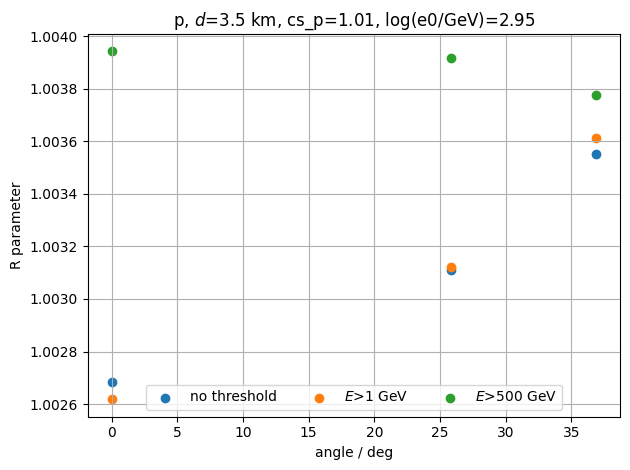

In [34]:
plt.figure()
plt.scatter(angles, results_all_35,label='no threshold')
plt.scatter(angles, results_1_35,label='$E$>1 GeV')
plt.scatter(angles, results_500_35,label='$E$>500 GeV')

plt.xlabel('angle / deg')
plt.ylabel('R parameter')
plt.legend(loc='lower center',ncol=3)
plt.title('p, $d$=3.5 km, cs_p=1.01, log(e0/GeV)=2.95')

plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'R_depth3.5_integrationthreshold.png' )

In [35]:
def dRdsigma(array):
    sig1 = 1.
    sig2 = 1.01
    R1 = 1
    R2 = array

    return (R2-R1)/(sig2-sig1)

In [40]:
dRdsig_all_35 = dRdsigma(results_all_35)
dRdsig_all_15 = dRdsigma(results_all_15)

dRdsig_1_35 = dRdsigma(results_1_35)
dRdsig_1_15 = dRdsigma(results_1_15)

dRdsig_500_35 = dRdsigma(results_500_35)
dRdsig_500_15 = dRdsigma(results_500_15)

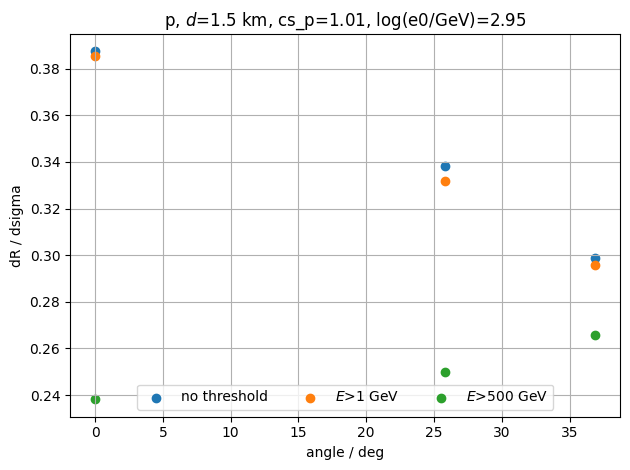

In [41]:
plt.figure()
plt.scatter(angles, dRdsig_all_15,label='no threshold')
plt.scatter(angles,dRdsig_1_15,label='$E$>1 GeV')
plt.scatter(angles, dRdsig_500_15,label='$E$>500 GeV')

plt.xlabel('angle / deg')
plt.ylabel('dR / dsigma')
plt.legend(loc='lower center',ncol=3)
plt.title('p, $d$=1.5 km, cs_p=1.01, log(e0/GeV)=2.95')

plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'dRdsig_depth1.5_integrationthreshold.png' )

In [47]:
dRdsig_500_15/dRdsig_all_15

array([0.88981433, 0.73876855, 0.61460999])

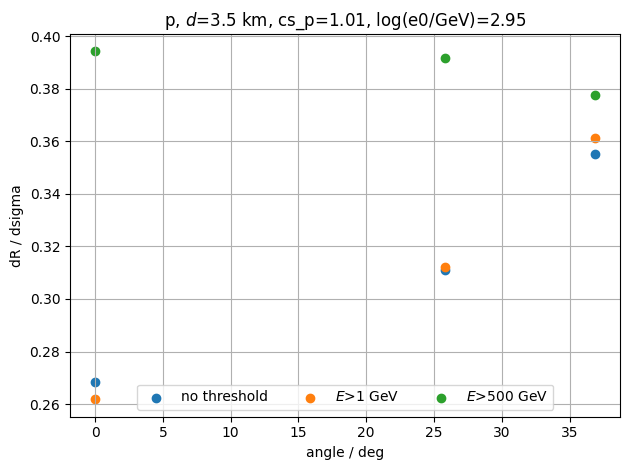

In [42]:
plt.figure()
plt.scatter(angles, dRdsig_all_35,label='no threshold')
plt.scatter(angles,dRdsig_1_35,label='$E$>1 GeV')
plt.scatter(angles, dRdsig_500_35,label='$E$>500 GeV')

plt.xlabel('angle / deg')
plt.ylabel('dR / dsigma')
plt.legend(loc='lower center',ncol=3)
plt.title('p, $d$=3.5 km, cs_p=1.01, log(e0/GeV)=2.95')

plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'dRdsig_depth3.5_integrationthreshold.png' )

In [43]:
dRdsig_500_35**(-1)

array([2.64854599, 2.55263363, 2.53535735])

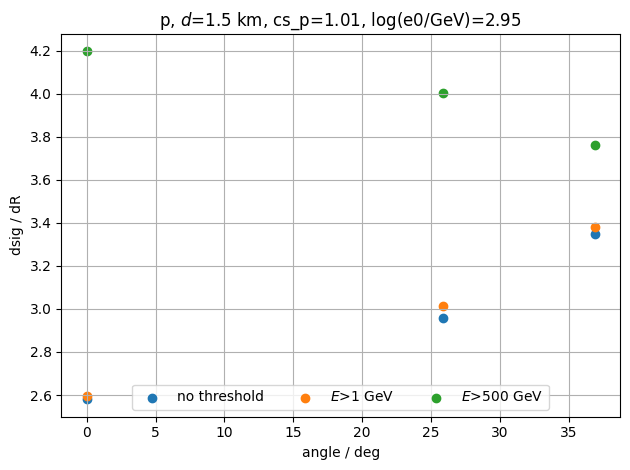

In [44]:
plt.figure()
plt.scatter(angles, dRdsig_all_15**(-1),label='no threshold')
plt.scatter(angles,dRdsig_1_15**(-1),label='$E$>1 GeV')
plt.scatter(angles, dRdsig_500_15**(-1),label='$E$>500 GeV')

plt.xlabel('angle / deg')
plt.ylabel('dsig / dR')
plt.legend(loc='lower center',ncol=3)
plt.title('p, $d$=1.5 km, cs_p=1.01, log(e0/GeV)=2.95')

plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'dsigdR_depth1.5_integrationthreshold.png' )

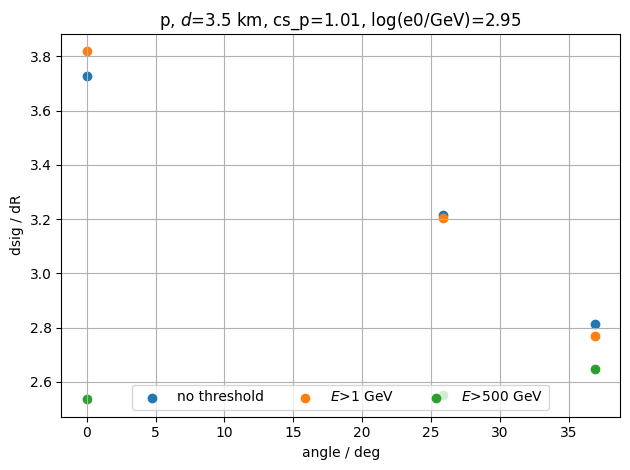

In [46]:
plt.figure()
plt.scatter(angles, dRdsig_all_35**(-1),label='no threshold')
plt.scatter(angles,dRdsig_1_35**(-1),label='$E$>1 GeV')
plt.scatter(angles, dRdsig_500_35**(-1),label='$E$>500 GeV')

plt.xlabel('angle / deg')
plt.ylabel('dsig / dR')
plt.legend(loc='lower center',ncol=3)
plt.title('p, $d$=3.5 km, cs_p=1.01, log(e0/GeV)=2.95')

plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'dsigdR_depth3.5_integrationthreshold.png' )